<a href="https://colab.research.google.com/github/OfekYa/DataMining/blob/main/Artificial_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ann_visualizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=c8d364c0dd22ce44575983997d7b19344de88dc5300acd70812b0b3559954155
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_bd = '/content/drive/MyDrive/Colab Notebooks//Data Mining/full_data.csv' 

df_bd = pd.read_csv(file_path_bd, index_col=0)
df_bd[df_bd.columns[-1]].replace({'ckd':0,'notckd':1},inplace=True)
df_bd = pd.get_dummies(df_bd, drop_first=True)

X_bd, y_bd = df_bd[df_bd.columns[:-1]], df_bd[df_bd.columns[-1]]
X_train_bd, X_test_bd, y_train_bd, y_test_bd = train_test_split(X_bd, y_bd, test_size=0.33)

In [ ]:
file_path_ad = '/content/drive/MyDrive/Colab Notebooks//Data Mining/full_data_after_Discretization.csv'

df_ad = pd.read_csv(file_path_ad, index_col=0)
#print(df_ad[df_ad.columns[-1]].head())
df_ad[df_ad.columns[-1]].replace({'ckd':0,'notckd':1},inplace=True)
#print(df_ad[df_ad.columns[-1]].head())
df_ad = pd.get_dummies(df_ad, drop_first=True)

X_ad, y_ad = df_ad[df_ad.columns[:-1]], df_ad[df_ad.columns[-1]]

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.33, shuffle=True)
#print(df_ad[df_ad.columns[-1]].head())


In [ ]:
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping  
from sklearn.preprocessing import StandardScaler


In [ ]:
import keras.backend as K


In [ ]:

callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

def train_ANN(X_train, Y_train,X_test, Y_test, epochs=100):
    BATCH_SIZE=32
    EPOCHS = epochs
    IN_FEATURES = len(X_train.columns)
    
    print("shape of training data: ",X_train.shape)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)

    model = Sequential()
  
    #Adding First Hidden Layer
    model.add(tf.keras.layers.Dense(units=IN_FEATURES ,input_dim=IN_FEATURES ,activation="relu" ,use_bias=True))

    #Adding Second Hidden Layer
    model.add(tf.keras.layers.Dense(units=IN_FEATURES ,activation="relu"))

    #Adding Output Layer
    model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

    #Compiling ANN
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    print(K.eval(model.optimizer.lr))

    #Fitting ANN
    model.fit(X_train, Y_train, batch_size=BATCH_SIZE, validation_split=0.2, epochs=EPOCHS, verbose=0,callbacks=[callbacks])
   
    plt.style.use('ggplot')

    plt.plot(model.history.history['accuracy'], label='Accuracy')
    plt.plot(model.history.history['loss'] ,label='Loss')     
    plt.plot(model.history.history['val_accuracy'], label='val_Accuracy')
    plt.plot(model.history.history['val_loss'] ,label='val_Loss')
    plt.title('Model Loss and Accuracy')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Epochs')   
    plt.legend();
    plt.show()

    hist_df = pd.DataFrame(model.history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    #hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
    print(hist_df.head(100))
    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
    print('\n   values_of_best_model: \n',values_of_best_model)

    return model, sc

shape of training data:  (268, 29)
0.001


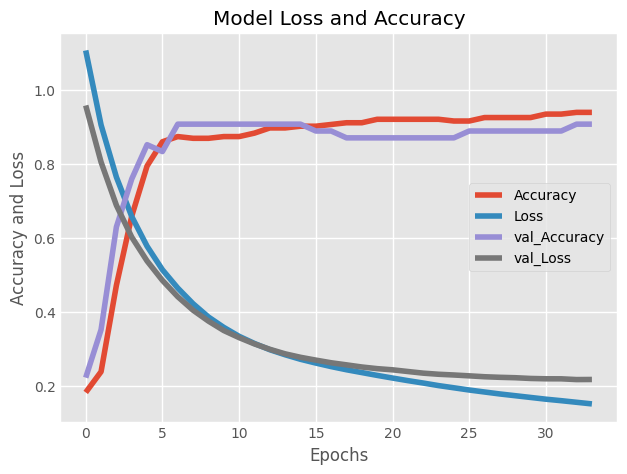

    epoch      loss  accuracy  val_loss  val_accuracy
0       1  1.106617  0.182243  0.957930      0.222222
1       2  0.905346  0.238318  0.804904      0.351852
2       3  0.764220  0.471963  0.688044      0.629630
3       4  0.657675  0.658879  0.602039      0.759259
4       5  0.577423  0.794393  0.537506      0.851852
5       6  0.513894  0.859813  0.485086      0.833333
6       7  0.464365  0.873832  0.440963      0.907407
7       8  0.422018  0.869159  0.404377      0.907407
8       9  0.386232  0.869159  0.375010      0.907407
9      10  0.358104  0.873832  0.349558      0.907407
10     11  0.333951  0.873832  0.330365      0.907407
11     12  0.314584  0.883178  0.313367      0.907407
12     13  0.297748  0.897196  0.298866      0.907407
13     14  0.284044  0.897196  0.286585      0.907407
14     15  0.271866  0.901869  0.277252      0.907407
15     16  0.261627  0.901869  0.269587      0.888889
16     17  0.252107  0.906542  0.262432      0.888889
17     18  0.243539  0.91121

In [ ]:
ann_ad, sc_ad = train_ANN(X_train_ad, y_train_ad, X_test_ad, y_test_ad, epochs=100)

In [ ]:
ann_ad.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 29)                870       
                                                                 
 dense_253 (Dense)           (None, 29)                870       
                                                                 
 dense_254 (Dense)           (None, 1)                 30        
                                                                 
Total params: 1,770
Trainable params: 1,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(ann_ad)


           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          29
               Dense   XXXXX -------------------       870    49.2%
                relu   #####          29
               Dense   XXXXX -------------------       870    49.2%
                relu   #####          29
               Dense   XXXXX -------------------        30     1.7%
             sigmoid   #####           1


In [ ]:
import graphviz

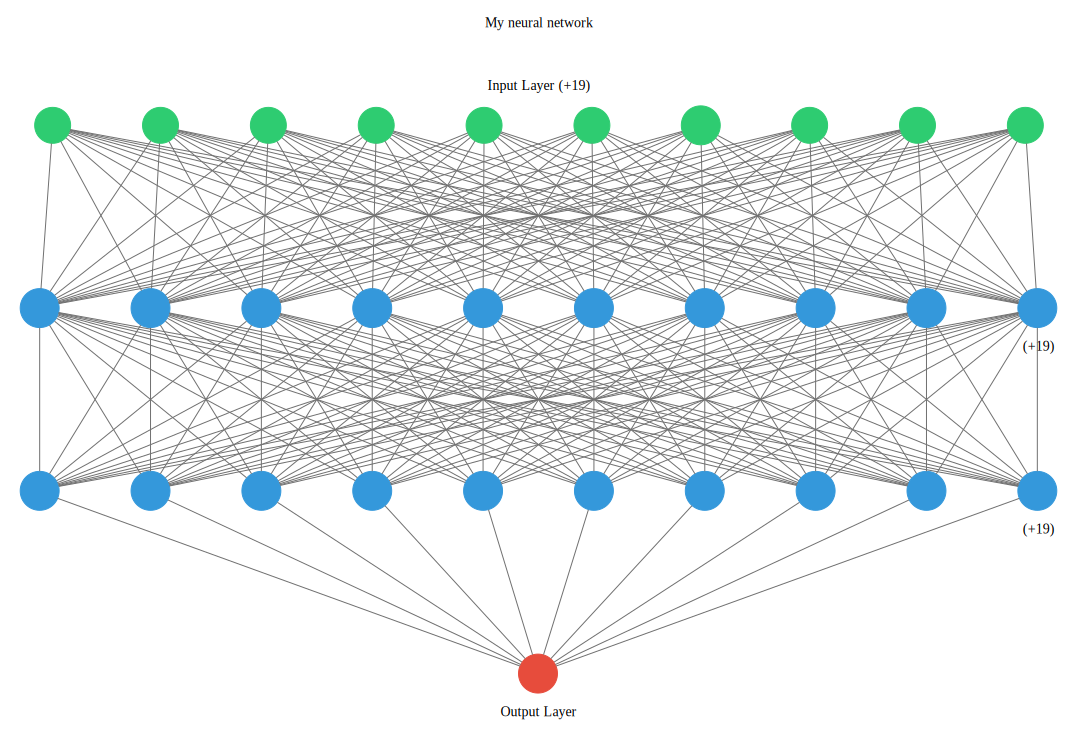

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(ann_ad, title="My neural network", filename='network.gv',view=True, );
graph_file = graphviz.Source.from_file('network.gv')
graph_file

In [ ]:
def test_ANN(model, sc, X_test, Y_test):
    print("shape of test data: ",X_test.shape)
   
    X_test = sc.transform(X_test)

    #show actual predicted values
    probs_pred = model.predict(X_test)
    y_pred = [1 if y>=0.5 else 0 for y in probs_pred]

    print('Test Accuracy: ', accuracy_score(Y_test, y_pred))
    print('\nConfusion Matrix: \n', confusion_matrix(Y_test, y_pred))
    print('\nSummary: \n', classification_report(Y_test, y_pred))
    
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print(f'True Neg: {tn}')
    print(f'False Pos: {fp}')
    print(f'False Neg: {fn}')
    print(f'True Pos: {tp}')

    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

  
    title = 'ROC AUC SCORE: {}'.format(roc_auc_score(Y_test,probs_pred))
    fpr, tpr, thresholds = roc_curve(Y_test, probs_pred)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='ANN')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(title)
    plt.show()

    return probs_pred, y_pred 


shape of test data:  (132, 29)
5/5 [==============================] - 0s 3ms/step
Test Accuracy:  0.8484848484848485

Confusion Matrix: 
 [[107   2]
 [ 18   5]]

Summary: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       109
           1       0.71      0.22      0.33        23

    accuracy                           0.85       132
   macro avg       0.79      0.60      0.62       132
weighted avg       0.83      0.85      0.81       132

True Neg: 107
False Pos: 2
False Neg: 18
True Pos: 5


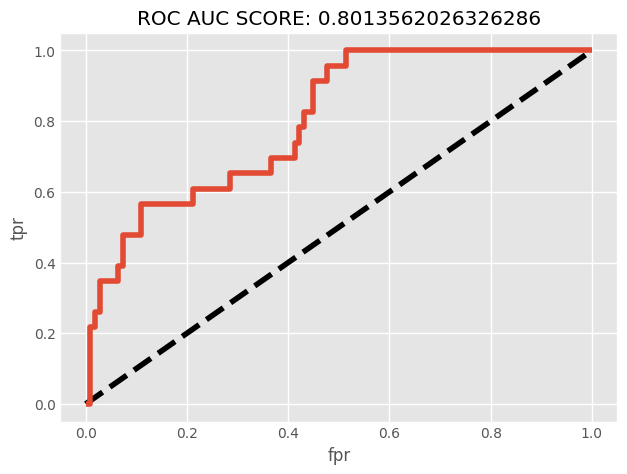

PROB:  torch.Size([132, 1])
PRED:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
LABELS:  torch.Size([132])


In [ ]:
import torch
#probs_pred_ad = torch.zeros((len(X_test_ad), 1),dtype=torch.int64)
#y_pred_ad = torch.zeros(len(X_test_ad), dtype=torch.int64)

probs_ad, pred_ad = test_ANN(model=ann_ad, sc=sc_ad, X_test=X_test_ad, Y_test=y_test_ad)
#print(probs_ad)
#print(pred_ad)

labels_ad = torch.tensor(y_test_ad.values, dtype=torch.int64)
y_probs_ad = torch.tensor(probs_ad)
y_pred_ad = torch.tensor(pred_ad)

print('PROB: ', y_probs_ad.shape)
print('PRED: ', y_pred_ad)
print('LABELS: ', labels_ad.shape)

#wrongest_10_predictions = torch.topk(y_probs_ad, k=5)

#probs_pred_ad[:] = torch.from_numpy(probs_ad).to(probs_pred_ad)
#y_pred_ad[:] = torch.FloatTensor(pred_ad)

In [ ]:

def wrongest_predicitions(y_probs, y_preds, Y_test):
  
    wrong_pred = (y_preds != Y_test)  # If predicted class is wrong then value=True, else False.
    wrong_pred_probs = y_probs * wrong_pred  # When the prediction is wrong, the value will be the probability value, else 0.000 .
    wrongest_10_predictions = torch.topk(wrong_pred_probs, k=10)  # Take the 10 most extreme errors from 'wrong_pred_probs'.
    wrongest_pred_probs, pred_indexs = wrongest_10_predictions

    for wrong_pred in range(10): 
        print('----------', wrong_pred, '----------------')
        
        sample_pred_prob = wrongest_pred_probs[wrong_pred][wrong_pred]  # The probability of the misclassified sample.
        print('sample_pred_prob: ',1-sample_pred_prob)
        
        sample_index = pred_indexs[wrong_pred][wrong_pred]  # The index of the misclassified sample.
        print('sample_index: ', int(sample_index))

        print(X_test_ad.iloc[int(sample_index)])

        wrong_label_pred =  y_preds[sample_index]
        print('wrong_label_pred: ', int(wrong_label_pred))
        
        correct_label = Y_test[sample_index] 
        print('correct_label: ', int(correct_label))

  


In [ ]:
wrongest_predicitions(y_probs_ad, y_pred_ad, labels_ad)


---------- 0 ----------------
sample_pred_prob:  tensor(0.8974)
sample_index:  94
Age                              34.00
Blood Pressure                   70.00
Specific Gravity                  1.02
Albumin                           0.00
Sugar                             0.00
Blood Glucose Random            148.00
Sodium                          130.00
Potassium                         3.80
Hemoglobin                        6.00
White Blood Cell Count         8406.00
Red Blood Cell Count              4.70
Class                             0.00
Red Blood_normal                  1.00
Pus Cell_normal                   1.00
Pus Cell clumps_present           0.00
Bacteria_present                  0.00
Blood Urea_high                   0.00
Blood Urea_low                    0.00
Blood Urea_normal                 0.00
Serum Creatinine_high             0.00
Serum Creatinine_low              0.00
Serum Creatinine_normal           0.00
Packed Cell Volume_low            0.00
Packed Cell Volume_no